In [46]:
import pandas as pd
import numpy as np
import librosa.display
import librosa
import os
import xlsxwriter
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance


In [47]:
PATH = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Resources/Audios_Euclidean_Distance/'
entries = os.listdir(PATH)

### Promedio de coeficientes en todas las ventanas

Cada audio sera representado por un vector de 20 pocisiones,que corresponden a la cantidad de coeficientes MFCCS, cada valor de coeficientes, es la media de ese valor en todas las ventanas

In [48]:
speaker = []
AMMfccs = []
juan = []
gabriel = []
jose = []
leo = []
angelower = []
carlos = []
indexs = []
for file_path in entries:
    file_name_array = file_path.split('_')
    name = file_name_array[0]
    x , sr = librosa.load(PATH+file_path)
    x, index = librosa.effects.trim(x) #  Trim leading and trailing silence from an audio signal.
    x_normalize=sk.preprocessing.minmax_scale(x, axis=0) # Normalizamos
    mfccs = librosa.feature.mfcc(x_normalize, sr=sr,n_mfcc=20,hop_length=int(0.010*sr), n_fft=int(0.025*sr))    
    mean_horizontal = np.mean(mfccs,axis=1) 
    AMMfccs.append(mean_horizontal)
    indexs.append(file_name_array[1])
    speaker.append(name)    

In [49]:
len(AMMfccs)

30

In [50]:
len(AMMfccs[0])

20

In [51]:
AMMfccs[0]

array([-410.42862  ,  137.82591  ,    6.467445 ,   66.05672  ,
         15.969981 ,   20.769308 ,   -5.629593 ,    7.3428426,
          9.304011 ,    1.1356189,   11.913657 ,    8.97188  ,
         12.626515 ,    9.295541 ,   13.702841 ,   12.138951 ,
          6.1977882,    3.8975644,    5.9377522,   -1.0861038],
      dtype=float32)

In [52]:
df = pd.concat([pd.DataFrame(speaker),pd.DataFrame(indexs),pd.DataFrame(AMMfccs)],axis=1)

In [53]:
df

,0,0,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,Carlos,2.wav,-410.428619,137.825912,6.467445,66.056717,15.969981,20.769308,-5.629593,7.342843,...,11.913657,8.971880,12.626515,9.295541,13.702841,12.138951,6.197788,3.897564,5.937752,-1.086104
1,jose,4.wav,-417.337128,155.746094,27.141970,55.741158,23.338461,27.041424,-1.638731,2.164263,...,-0.725966,6.693077,14.444851,-6.161411,9.441757,-0.993944,4.068299,6.870426,8.809889,8.003078
2,angelower,2.wav,-391.784058,155.925735,16.979786,52.189411,8.349576,20.301081,-6.347400,11.066203,...,2.917059,8.183738,12.456155,-0.563185,17.069151,-1.285001,6.607967,2.372969,6.471777,9.658555
3,gabriel,3.wav,-408.034332,158.001602,9.784573,44.036667,8.287763,6.217870,6.310658,17.599701,...,4.130869,-6.465317,20.262196,-1.047065,19.277533,5.953474,12.904816,8.331708,0.761601,12.306004
4,angelower,3.wav,-397.469757,166.415054,27.304844,50.485355,2.521376,19.012827,-4.046612,13.344780,...,2.949759,9.038746,12.862773,-1.238639,17.841839,-2.625374,6.633056,3.160755,4.262032,8.779312
5,Juan,1.wav,-489.268951,141.843689,27.339748,48.621418,32.793892,5.222339,11.712940,17.410179,...,12.407512,10.553156,9.755689,14.210469,13.348680,6.763900,12.046347,11.437761,4.328821,4.052202
6,jose,5.wav,-436.822998,158.957443,30.303907,44.052288,25.514423,23.641520,-9.925896,-0.582180,...,1.505219,8.653520,11.317878,-4.645825,10.184164,0.302295,7.352313,9.895895,7.785375,7.383399
7,Juan,3.wav,-494.551056,144.494568,35.075573,46.211224,26.549072,2.127945,9.298095,23.551153,...,11.007185,12.136578,10.476271,12.372845,14.356983,9.391697,11.150710,10.471252,6.094805,4.828914
8,Leon,5.wav,-469.081421,133.568848,43.227108,62.730415,13.534617,38.836456,7.062045,-0.948996,...,11.076569,6.164742,2.394441,9.142748,9.984063,-1.019521,9.186169,5.438582,6.956268,2.091847
9,Leon,2.wav,-486.761780,129.063873,40.764915,62.214413,17.574776,35.844135,10.773621,4.309236,...,12.352905,7.281875,1.403601,7.684685,11.463906,0.728711,8.404913,4.884317,6.857611,2.618780


In [55]:
writer = pd.ExcelWriter('sounds_20_Average_MFCCs.xlsx', engine='xlsxwriter')
df.to_excel(writer,sheet_name='welcome',index=False)
writer.save()

## Euclidean distance value

### Distancia euclidiana para todos los  sounds

## Sound 1

In [9]:
path_mfcc = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/sounds_20_Average_MFCCs.xlsx'
sheet_name= 'Sound_1'

In [10]:
df_mfcc = pd.read_excel(path_mfcc,sheet_name)

In [11]:
df_mfcc

,Speaker,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Juan,-489.268951,141.843689,27.339748,48.621418,32.793892,5.222339,11.712940,17.410179,7.447361,...,12.407512,10.553156,9.755689,14.210469,13.348680,6.763900,12.046347,11.437761,4.328821,4.052202
1,Carlos,-388.236816,148.985840,0.763705,64.606606,6.966876,27.405315,-8.117297,2.524459,11.865649,...,9.367017,11.224467,10.222484,3.531495,16.862360,9.415762,7.602947,2.892648,1.681658,-0.036149
2,gabriel,-386.171356,169.897339,2.117451,46.414829,5.577926,8.314298,-3.959246,22.410234,-9.158608,...,10.688271,-0.068167,13.174115,-2.461280,18.940914,1.053323,13.365220,5.207536,1.672616,9.882724
3,angelower,-372.765961,169.361954,14.956924,52.188572,-2.465010,21.310566,-12.425127,12.080429,7.596858,...,7.816771,8.732953,11.825103,-1.156250,18.254219,-1.392215,5.083097,2.058661,4.966379,6.226429
4,Leon,-467.891174,143.408081,45.135857,49.683308,13.029440,42.516193,5.719288,-0.953285,4.176380,...,14.583301,3.241898,3.003604,14.643539,10.160566,0.754027,8.131926,-0.940522,2.479518,8.273428
5,jose,-382.869781,178.636414,8.424109,49.877079,23.968189,14.848051,-8.800088,6.729167,0.023298,...,-4.667882,6.634112,19.090151,-12.787160,17.927725,2.229565,-2.647850,4.884585,4.909947,9.372604


In [12]:
columns = df_mfcc.columns

In [13]:
columns

Index(['Speaker', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19],
      dtype='object')

In [14]:
len(df_mfcc.iloc[0,1:])

20

In [15]:
juan = df_mfcc.iloc[0,1:]
juan

0    -489.269
1     141.844
2     27.3397
3     48.6214
4     32.7939
5     5.22234
6     11.7129
7     17.4102
8     7.44736
9     8.19834
10    12.4075
11    10.5532
12    9.75569
13    14.2105
14    13.3487
15     6.7639
16    12.0463
17    11.4378
18    4.32882
19     4.0522
Name: 0, dtype: object

In [23]:
carlos = df_mfcc.iloc[0,0:]
carlos

Speaker       Juan
0         -489.269
1          141.844
2          27.3397
3          48.6214
4          32.7939
5          5.22234
6          11.7129
7          17.4102
8          7.44736
9          8.19834
10         12.4075
11         10.5532
12         9.75569
13         14.2105
14         13.3487
15          6.7639
16         12.0463
17         11.4378
18         4.32882
19          4.0522
Name: 0, dtype: object

In [20]:
dst_juan_carlos = distance.euclidean(juan, carlos)
dst_juan_carlos

115.31011132624836

In [60]:
path_mfcc = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/sounds_20_Average_MFCCs.xlsx'
sheet_name= ['Sound_1','Sound_2','Sound_3','Sound_4','Sound_5']

for sh in sheet_name:
    df_mfcc = pd.read_excel(path_mfcc,sh)
    speakers_1 = []
    speakers_2 = []
    de = []
    for i in range(0,6):
        sp1 =  df_mfcc.iloc[i,0] 
        n =  df_mfcc.iloc[i,1:]
        for j in range(0,6):
            sp2 =  df_mfcc.iloc[j,0]
            m =  df_mfcc.iloc[j,1:]
            d = distance.euclidean(n,m)
            speakers_1.append(sp1)
            speakers_2.append(sp2)
            de.append(d)
            #print(sp1 ,'Vs' , sp2, 'D => ', str(d))
    df = pd.concat([pd.DataFrame(speakers_1),pd.DataFrame(speakers_2),pd.DataFrame(de)],axis=1)
    writer = pd.ExcelWriter('Euclidean_Distance_'+sh+'_'+'.xlsx', engine='xlsxwriter')
    df.to_excel(writer,sheet_name=sh,index=False)
    writer.save()

In [61]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=12):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right', fontsize=fontsize)
    plt.ylabel('Acoustic mean value speaker MFCC')
    plt.xlabel('Acoustic mean value speaker MFCC')
    #return fig

In [65]:
path_ed_sounds = '/home/josearangos/Documentos/UdeA/2019-2/PI2/Utilities/Euclidean_Distance/Enfoque_promedio_mffccs/Euclidean_Distance_Average_MFFC.xlsx'

def print_confusion_matrix_by_sound(sheet_name):
    df_ed_sound = pd.read_excel(path_ed_sounds,sheet_name)
    class_names = list(df_ed_sound['Speaker'])
    df_ed_sound = df_ed_sound.iloc[:,1:]
    confusion_matrix = df_ed_sound.values
    print_confusion_matrix(confusion_matrix, class_names)
    print(df_ed_sound)

## Sound 1

         Juan      Carlos     gabriel   angelower        Leon        jose
0    0.000000  115.310111  117.922116  130.977667   57.357194  123.476721
1  115.310111    0.000000   49.128130   38.447738   97.830321   51.302365
2  117.922116   49.128130    0.000000   36.504217  108.925803   39.589999
3  130.977667   38.447738   36.504217    0.000000  111.178485   39.481309
4   57.357194   97.830321  108.925803  111.178485    0.000000  112.286271
5  123.476721   51.302365   39.589999   39.481309  112.286271    0.000000


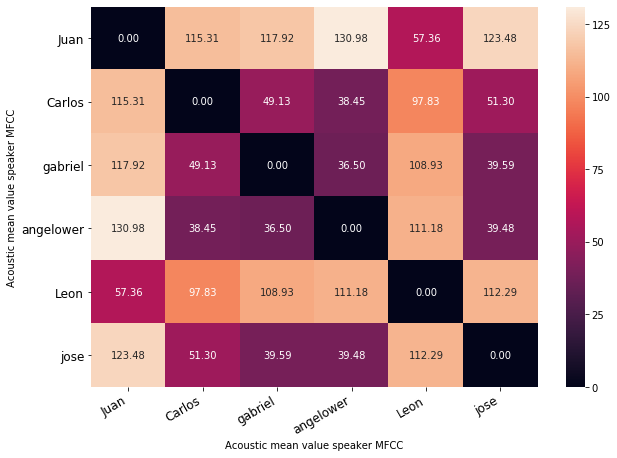

In [67]:
print_confusion_matrix_by_sound('EDSound1')

## Sound 2

      Carlos   angelower        Leon     gabriel        Juan       jose
0   0.000000   39.424565   89.380224   53.529432   95.135630  56.852755
1  39.424565    0.000000  107.218285   40.127439  112.494821  51.975838
2  89.380224  107.218285    0.000000  110.732761   46.070682  83.317477
3  53.529432   40.127439  110.732761    0.000000  106.921918  46.133616
4  95.135630  112.494821   46.070682  106.921918    0.000000  85.213330
5  56.852755   51.975838   83.317477   46.133616   85.213330   0.000000


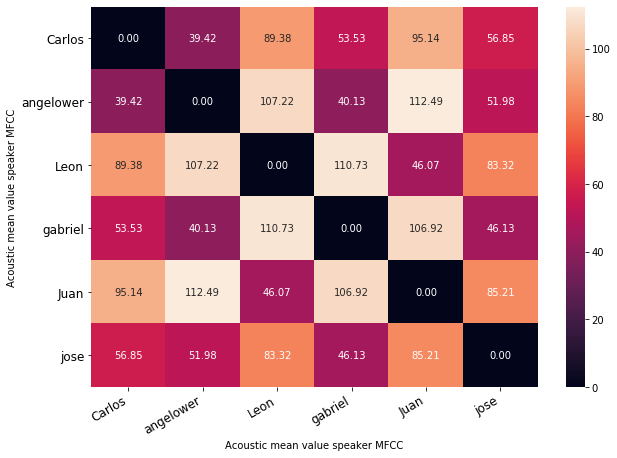

In [68]:
print_confusion_matrix_by_sound('EDSound2')

## Sound 3

      gabriel   angelower        Juan     Carlos       jose       Leon
0    0.000000   42.665389  100.709584  53.709030  59.073110  90.629334
1   42.665389    0.000000  107.967076  45.804665  53.786132  86.470946
2  100.709584  107.967076    0.000000  87.489044  64.695737  54.547152
3   53.709030   45.804665   87.489044   0.000000  51.660911  65.439191
4   59.073110   53.786132   64.695737  51.660911   0.000000  51.108607
5   90.629334   86.470946   54.547152  65.439191  51.108607   0.000000


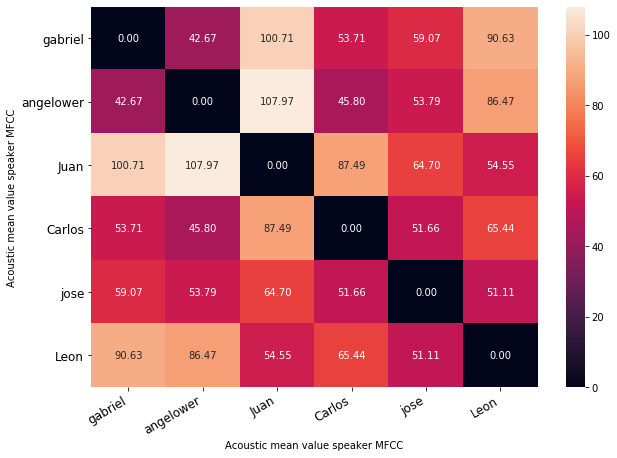

In [69]:
print_confusion_matrix_by_sound('EDSound3')

## Sound 4

        jose  angelower       Juan       Leon     Carlos    gabriel
0   0.000000  31.794642  81.638642  65.489000  55.884901  45.943825
1  31.794642   0.000000  88.327679  72.068457  52.563676  39.665199
2  81.638642  88.327679   0.000000  52.985504  63.620942  89.075418
3  65.489000  72.068457  52.985504   0.000000  51.465126  82.718072
4  55.884901  52.563676  63.620942  51.465126   0.000000  62.258697
5  45.943825  39.665199  89.075418  82.718072  62.258697   0.000000


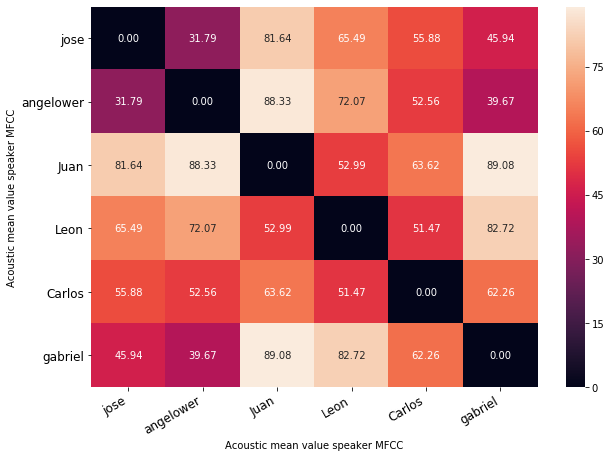

In [70]:
print_confusion_matrix_by_sound('EDSound4')

## Sound 5

        jose        Leon  angelower     gabriel       Juan     Carlos
0   0.000000   57.605060  56.985555   65.157145  50.009712  58.393708
1  57.605060    0.000000  94.795495  103.180755  53.485380  77.033222
2  56.985555   94.795495   0.000000   45.048592  87.090399  45.151969
3  65.157145  103.180755  45.048592    0.000000  84.259127  55.249341
4  50.009712   53.485380  87.090399   84.259127   0.000000  73.515274
5  58.393708   77.033222  45.151969   55.249341  73.515274   0.000000


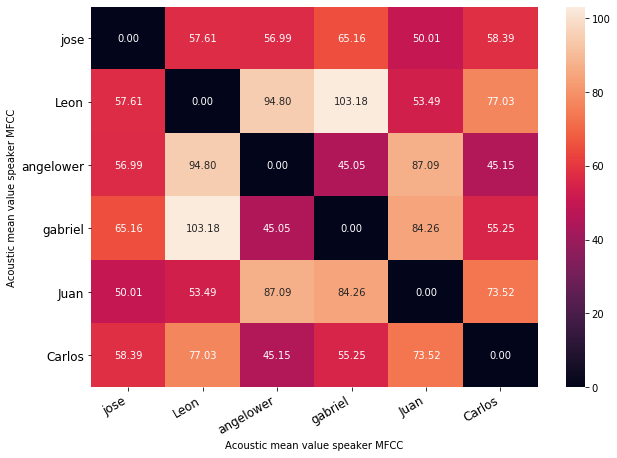

In [71]:
print_confusion_matrix_by_sound('EDSound5')